In [12]:
import tensorflow as tf 
import numpy as np 
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from MTRB import MTRB
from GTMB import GTMB
from LTMB import LTMB

In [14]:
img = imageio.imread('proj_files/train/000000.png')
print(np.shape(img))


(1024, 1024, 3)


In [15]:
output_list = []
d_list_a = (1,2,3,2,1)
d_list_b = (1,2,3,2,1)
d_list_c = (1,2,2,2,1)
# Branch I ############################################################################################
inputs = tf.keras.Input(shape = (1024, 1024, 3), name = "img")
inputs_ = tf.nn.space_to_depth(inputs, 2)
t1 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu") (inputs_)
t1 = MTRB(t1, d_list_a)
########################################################################################################

# Branch II ###########################################################################################
t2 = tf.keras.layers.ZeroPadding2D(padding=(1,1))(t1)
t2 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu", strides = (2, 2)) (t2)
t2 = MTRB(t2, d_list_b)
########################################################################################################

# Branch III ###########################################################################################
t3 = tf.keras.layers.ZeroPadding2D(padding=(1,1))(t2)
t3 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu", strides = (2, 2)) (t3)
t3 = MTRB(t3, d_list_c)
t3 = GTMB(t3)
t3 = LTMB(t3, d_list_c)
t3 = tf.keras.layers.Conv2D(12, kernel_size = (3, 3), padding = "same") (t3)
t3_out = tf.nn.depth_to_space(t3, 2)
output_list.append(t3_out)
########################################################################################################

# Branch II (cont.) ####################################################################################
_t2 = tf.keras.layers.Concatenate()([t3_out, t2])
_t2 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu") (_t2)
_t2 = GTMB(_t2)
_t2 = MTRB(_t2, d_list_b)
_t2 = GTMB(_t2)
_t2 = LTMB(_t2, d_list_b)
_t2 = tf.keras.layers.Conv2D(12, kernel_size = (3, 3), padding = "same") (_t2)
t2_out = tf.nn.depth_to_space(_t2, 2)
output_list.append(t2_out)
########################################################################################################

# Branch I (cont.) #####################################################################################
_t1 = tf.keras.layers.Concatenate()([t1, t2_out])
_t1 = tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu") (_t1)
_t1 = GTMB(_t1)
_t1 = MTRB(_t1, d_list_a)
_t1 = GTMB(_t1) 
_t1 = LTMB(_t1, d_list_a)
_t1 = tf.keras.layers.Conv2D(12, kernel_size = (3, 3), padding = "same") (_t1)
output = tf.nn.depth_to_space(_t1, 2)
output_list.append(output)
########################################################################################################



In [16]:
model = tf.keras.Model(inputs, output, name = "lbpf")

Model: "lbpf"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 1024, 1024,  0           []                               
                                 3)]                                                              
                                                                                                  
 tf.nn.space_to_depth (TFOpLamb  (None, 512, 512, 12  0          ['img[0][0]']                    
 da)                            )                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 12  13952       ['tf.nn.space_to_depth[0][0]']   
                                8)                                                             

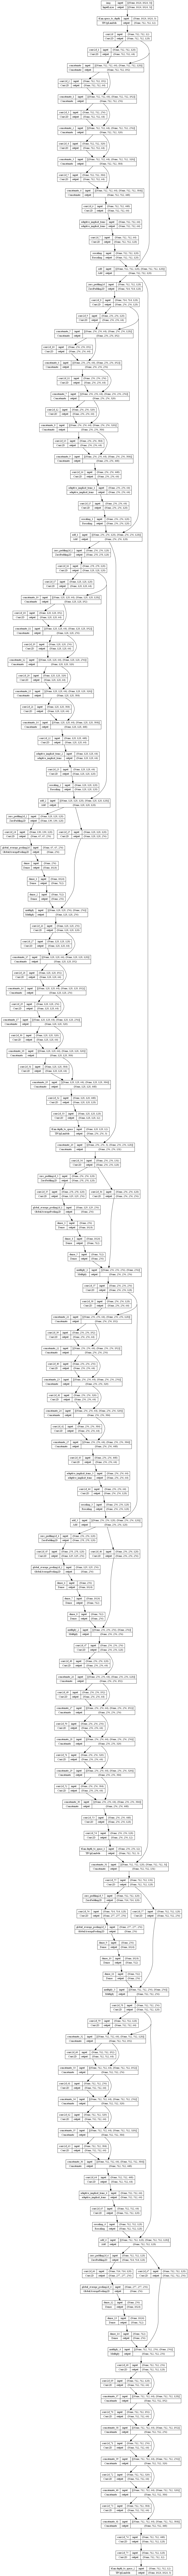

In [17]:
model.summary()
tf.keras.utils.plot_model(model, "LBPF.png", show_shapes = True)

In [18]:
X_train = np.zeros((100, 1024, 1024, 3))
folder = 'proj_files/train/' 
ext = '.png' 

for i in range(10):
    file = folder + '00000' + str(i) + ext 
    print("reading", file)
    X_train[i, :, :, :] = imageio.imread(file)

for i in range(10, 100):
    file = folder + '0000' + str(i) + ext 
    print("reading", file)
    X_train[i, :, :, :] = imageio.imread(file)
    
y_train = np.zeros((100, 1024, 1024, 3))
folder = 'proj_files/validation/' 
for i in range(10):
    file = folder + '00000' + str(i) + ext 
    print("reading", file)
    X_train[i, :, :, :] = imageio.imread(file)

for i in range(10, 100):
    file = folder + '0000' + str(i) + ext 
    print("reading", file)
    X_train[i, :, :, :] = imageio.imread(file)


reading proj_files/train/000000.png
reading proj_files/train/000001.png
reading proj_files/train/000002.png
reading proj_files/train/000003.png
reading proj_files/train/000004.png
reading proj_files/train/000005.png
reading proj_files/train/000006.png
reading proj_files/train/000007.png
reading proj_files/train/000008.png
reading proj_files/train/000009.png
reading proj_files/train/000010.png
reading proj_files/train/000011.png
reading proj_files/train/000012.png
reading proj_files/train/000013.png
reading proj_files/train/000014.png
reading proj_files/train/000015.png
reading proj_files/train/000016.png
reading proj_files/train/000017.png
reading proj_files/train/000018.png
reading proj_files/train/000019.png
reading proj_files/train/000020.png
reading proj_files/train/000021.png
reading proj_files/train/000022.png
reading proj_files/train/000023.png
reading proj_files/train/000024.png
reading proj_files/train/000025.png
reading proj_files/train/000026.png
reading proj_files/train/000

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.MeanSquaredError()])

In [20]:
model.fit(x = X_train, y = y_train, epochs = 2)

Epoch 1/2


TypeError: <tf.Tensor 'lbpf/adaptive_implicit_trans/mul:0' shape=(1, 1, 64, 64) dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.

<tf.Tensor 'lbpf/adaptive_implicit_trans/mul:0' shape=(1, 1, 64, 64) dtype=float32> was defined here:
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\14106\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\14106\AppData\Local\Temp\ipykernel_28836\880937807.py", line 1, in <module>
      model.fit(x = X_train, y = y_train, epochs = 2)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
      result = self._call(*args, **kwds)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\eager\def_function.py", line 963, in _call
      self._initialize(args, kwds, add_initializers_to=initializers)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\eager\def_function.py", line 785, in _initialize
      self._stateful_fn._get_concrete_function_internal_garbage_collected(  # pylint: disable=protected-access
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\eager\function.py", line 2480, in _get_concrete_function_internal_garbage_collected
      graph_function, _ = self._maybe_define_function(args, kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\eager\function.py", line 2711, in _maybe_define_function
      graph_function = self._create_graph_function(args, kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\eager\function.py", line 2627, in _create_graph_function
      func_graph_module.func_graph_from_py_func(
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1141, in func_graph_from_py_func
      func_outputs = python_func(*func_args, **func_kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\eager\def_function.py", line 677, in wrapped_fn
      out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1116, in autograph_handler
      return autograph.converted_call(
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\distribute\distribute_lib.py", line 1312, in run
      return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\distribute\distribute_lib.py", line 2888, in call_for_each_replica
      return self._call_for_each_replica(fn, args, kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\distribute\distribute_lib.py", line 3689, in _call_for_each_replica
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\Documents\GitHub\LBPF\ait.py", line 36, in call
      self.kernel = self.kernel*self.it_weights
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1406, in binary_op_wrapper
      return func(x, y, name=name)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1766, in _mul_dispatch
      return multiply(x, y, name=name)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\util\dispatch.py", line 1082, in op_dispatch_handler
      return dispatch_target(*args, **kwargs)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\ops\math_ops.py", line 529, in multiply
      return gen_math_ops.mul(x, y, name)
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 6588, in mul
      _, _, _op, _outputs = _op_def_library._apply_op_helper(
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 797, in _apply_op_helper
      op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\framework\func_graph.py", line 694, in _create_op_internal
      return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\framework\ops.py", line 3754, in _create_op_internal
      ret = Operation(
    File "c:\Users\14106\anaconda3\envs\LBPF\lib\site-packages\tensorflow\python\framework\ops.py", line 2133, in __init__
      self._traceback = tf_stack.extract_stack_for_node(self._c_op)

The tensor <tf.Tensor 'lbpf/adaptive_implicit_trans/mul:0' shape=(1, 1, 64, 64) dtype=float32> cannot be accessed from here, because it was defined in FuncGraph(name=train_function, id=2418456282832), which is out of scope.